# COVID-19 Analysis of Colombia

![Columbian Flag](https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Colombia.svg/255px-Flag_of_Colombia.svg.png)

COVID-19 is a infectious disease in which the affected individual may experience respiratory, cold-like symptoms. These symptoms are often mild, but cases can be serious or deadly. The outbreak of COVID-19 began in March 2020, sparking lockdowns and restrictions across the world. 

Data source: [Eurpoean Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

Institution: James Madison University, Harrisonburg VA

Authors: Samantha Wootten, Caleb Hubbard

Email: woottesc@dukes.jmu.edu , hubbarwc@dukes.jmu.edu

# Import Data

In [1]:
%matplotlib inline
!pip install xlrd
import pandas as pd 

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.6 MB/s eta 0:00:00


## Visualize Initial Data Pull

In [2]:
df = pd.read_excel('s3://wootten-241-2023-python/covid_data.xls') # provide the data location
df.head() #show the top 5 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


This table shows the top 5 rows of the data that we imported from the European Centre for Disease Prevention and Control. This data set includes data from countries worldwide, but for the purposes of this table, it's only showing the top five results by countries in alphabetical order. Since they are listed in alphabetical order, Afghanistan is the country displayed above.

# Visualization of Case Numbers in 2020

/tmp/ipykernel_8295/1334854301.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dateRep'] = pd.to_datetime(df['dateRep']) #convert to date format


<AxesSubplot: xlabel='dateRep'>

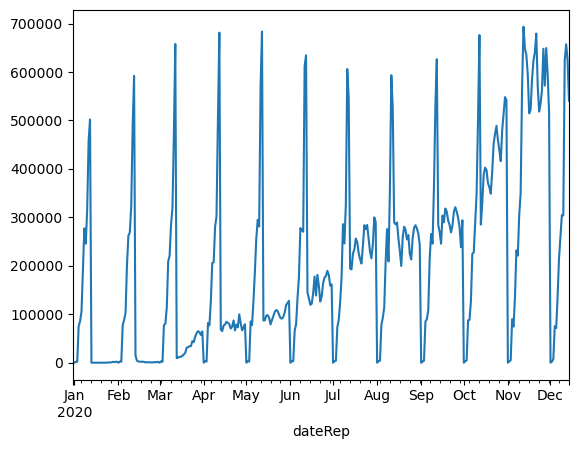

In [3]:
df['dateRep'] = pd.to_datetime(df['dateRep']) #convert to date format

sum_death_by_date = df.groupby('dateRep')['cases'].sum()
sum_death_by_date.plot()

### Analysis

This line chart visualizes the number of COVID-19 cases from January-December 2020. This graph, unlike some of the later visualizations, reflects the presence of COVID-19 worldwide rather than just at a specific country. The cases began with a spike of 500k cases in January 2020 and rose to almost 700k in April, May and November. The spikes for each month represent a delay in 
the symptoms and recording of cases. Case spikes additionally came in waves. After March, case spikes became more frequent, following a trend of one large spike in cases followed by a steadier (yet lower) rate of COVID cases. The major spike for each month only varied from about 600k to 700k cases, while the smaller subsets of cases raised steadily as each month of 2020 passed.

# Top 10 Countries with the Highest Deaths


<AxesSubplot: xlabel='countriesAndTerritories'>

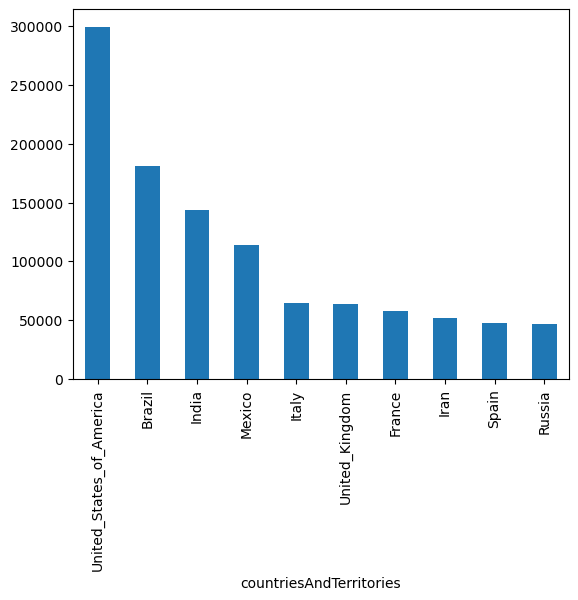

In [4]:
sum_death_by_country = df.groupby('countriesAndTerritories')['deaths'].sum()
sum_death_by_country.nlargest(10).plot.bar()

### Analysis

USA, Brazil, and India posess the 3 highest death tolls within the dataset. The United States reached around 300k deaths, while Brazil reached around 175k deaths as country with the second highest death toll. A contributing factor for this statistic may be the fact that the United States, Brazil and India are all high in population, all within the top 6 countries by overall population. This consideration is not meant to neglect the COVID response by each country. The death toll of each country reflects their overall affected population and effectiveness of COVID-19 protocols.

# Select the Columbia Data

In [6]:
colombia_data = df.loc[df['countriesAndTerritories'] == 'Colombia']
colombia_data.head() #the top 5 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
12448,2020-12-14,14,12,2020,8702,187,Colombia,CO,COL,50339443.0,America,233.212751
12449,2020-12-13,13,12,2020,8163,197,Colombia,CO,COL,50339443.0,America,233.333929
12450,2020-12-12,12,12,2020,8998,185,Colombia,CO,COL,50339443.0,America,235.201252
12451,2020-11-12,11,12,2020,7778,176,Colombia,CO,COL,50339443.0,America,237.237428
12452,2020-10-12,10,12,2020,7523,150,Colombia,CO,COL,50339443.0,America,240.650259


# Colombia Cases

<AxesSubplot: xlabel='month'>

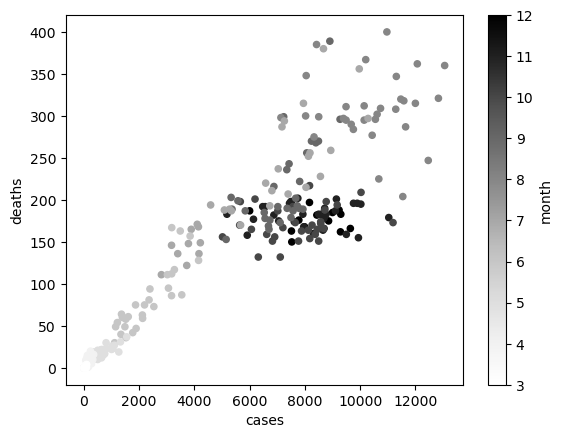

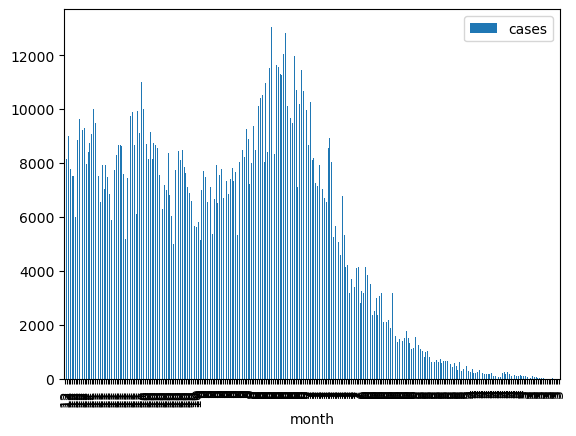

In [18]:
colombia_data.plot.scatter(x='cases',y='deaths',c= 'month')
colombia_data.plot.bar(x='month',y='cases')

## Analysis

As shown in the scattter plot above, Colombia saw its greatest number of both cases and deaths around month 8, despite its slow spread. Colombia began their lockdown protocols at the beginning of March, soon after their first cases were found. Lockdown delayed Colombia's impact of COVID-19 cases and deaths, but eventually they rose a considerable level. For a country heavily reliant on the workforce, Colombia's lockdown began to dwindle in success, a result of an extra early response. After around month 7 or 8, cases began to fall as seen in the second graph depicted above (after their rise).

# Neighboring Countries

In [8]:
panama_data = df.loc[df['countriesAndTerritories'] == 'Panama']
brazil_data = df.loc[df['countriesAndTerritories'] == 'Brazil']
venezuela_data = df.loc[df['countriesAndTerritories'] == 'Venezuela']

These following scatter plots represent the data from other countries that we are using to compare the Colombia data against. The order of the scatterplots are as follows: Panama, Ecuador, Venezuela. These countries were chosen due to their proximity to Colombia. By comparing Colombia's COVID cases/deaths to those of neighboring countries, we were able to assess the effectiveness of the pandemic response and overall country impact for which the argument of geographic distance can't be applied. The scatter
plot provided above reflects Colombia's cases and deaths per month across 2020. This plot is the basis for comparison to the following charts of Panama, Ecuador and Venezuela.

## Panama Data

<AxesSubplot: xlabel='cases', ylabel='deaths'>

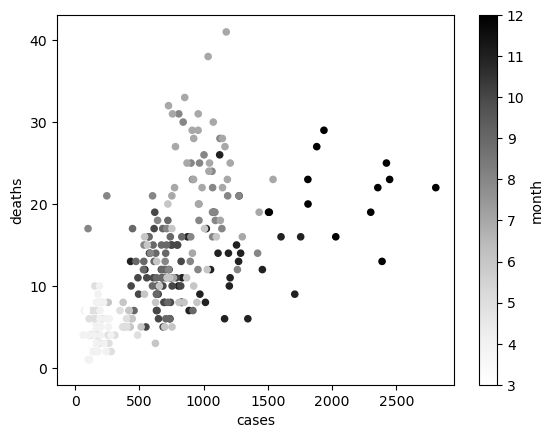

In [9]:
panama_data.plot.scatter(x='cases',y='deaths',c= 'month')

## Brazil Data

<AxesSubplot: xlabel='cases', ylabel='deaths'>

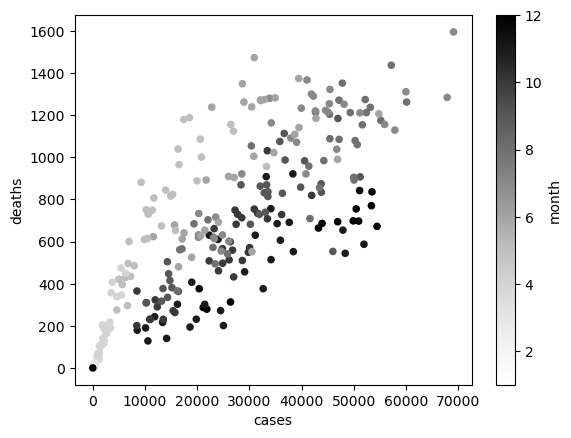

In [11]:
brazil_data.plot.scatter(x='cases',y='deaths',c= 'month')


## Venezuela Data

<AxesSubplot: xlabel='cases', ylabel='deaths'>

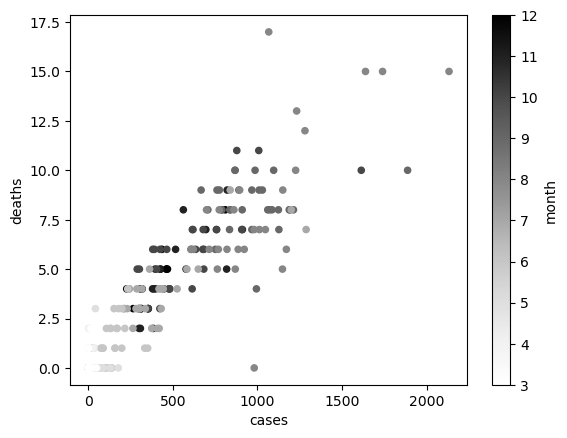

In [12]:
venezuela_data.plot.scatter(x='cases',y='deaths',c= 'month')

## Analysis

Colombia experienced the second most cases at over 12,000 cases in the country. However, in comparison to neighboring Brazil, who experienced the most deaths at over 1600 and approximately 70,000 cases in the country, the impact was not as detrimental from a statistical standpoint. Panama's case count was generally clustered between 500 and 1200 cases, except for month 12. Brazil had a more spread out distribution in the middle, representing a relatively even relationship between cases and deaths. Venezuela's distribution is unique in the sense that its data points are recorded in lines, likely signifying rounding or grouping when recording cases. Compared to its neighboring countries, Colombia had a distribution of greater deaths and cases, onset later. In Colombia and Panama, the first 4-5 months had a relatively low number of both cases and deaths. This was a slower spread than other Latin American countries like Brazil.

# Conclusion and Limitations

COVID-19 had a delayed impact on Colombia. The Colombian government announced a lockdown relatively early, consistent with the low number of deaths and cases within the first few months. As the consistency of lockdown began to fade, cases and deaths started to rise, ultimately resulting in a high number of cases/deaths around months 8 and 9. Neighboring countries had a more even distribution of cases and deaths. A limitation to this project is the consideration that the analysis is generally quantitative. Considerations such as political, cultural and demographic factors were not included in the graphs depicting COVID-19 within Colombia and its neighboring countries. Another limitation is the population difference between neighboring countries when analyzing the data. For a further project, we would suggest looking at data from months past 2020 to include variants and overall progression, along with the consideration of other factors previously mentioned.